In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

plt.style.use('seaborn')
sns.set(font_scale=2.5)

import missingno as msno

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

1. *데이터셋 확인* - 대부분의 캐글 데이터들은 잘 정제되어 있습니다. 하지만 가끔 null data가 존재합니다. 이를 확인하고, 향후 수정합니다.

2. *EDA* - 여러 feature 들을 개별적으로 분석하고 feature 들 간의 상관관계를 확인합니다. 여러 시각화 툴을 사용하여 insight 얻기

3. *feature engineering* - 모델을 세우기 앞서, 모델의 성능을 높일 수 있도록 feature 들을 engineering 합니다. one-hot encoding, class로 나누기, 구간으로 나누기, 텍스트 데이터 처리 등을 합니다

4. *model 만들기* - **sklearn**을 사용해 모델을 만듭니다. 파이썬에서 머신러닝을 할 때는 sklearn 을 사용하면 수많은 알고리즘을 일관된 문법으로 사용할 수 있습니다. 물론 딥러닝을 위해 tensorflow, pytorch 등을 사용할 수도 있습니다.

5. *모델 학습 및 예측* - trainset을 가지고 모델을 학습시킨 후, test set을 가지고 prediction 합니다.

6. *모델 평가* - 예측 성능이 원하는 수준인지 판단합니다. 풀려는 문제에 따라 모델을 평가하는 방식도 달라집니다. 학습된 모델이 어떤 것을 학습하였는지 확인해봅니다. 

# 1. Dataset 확인

- 파이썬에서 테이블화 된 데이터를 다루는데 가장 최적화 되어 있으며, 많이 쓰이는 라이브러리는 **pandas** 
- pandas를 사용해 데이터셋의 간단한 통계적 분석부터 복잡한 처리들을 간단한 메소드를 사용하여 해낼 수 있습니다
- 캐글에서 데이터셋은 보통 train, testset으로 나뉘어 있습니다.

In [3]:
df_train = pd.read_csv('data/train.csv')
df_test = pd.read_csv('data/test.csv')

In [4]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


- 우리가 다루는 문제에서 feature는 Pclass, Age, Sibsp, Parch, Fare이며, 예측하려는 target label은 survived 입니다.

- pandas dataframe 에는 describe() 메소드가 있는데, 이를 쓰면 각 feature가 가진 통계치들을 반환해줍니다.

In [5]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
df_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


- PassengerID 숫자와 다른 (null data가 존재하는) 열(feature)가 있다. 이를 보기 편하도록 그래프로 시각화해서 살펴보자 

## 1.1 Null data check


 

In [13]:
for col in df_train.columns:
    msg = 'column: {:>10}\t Percent of NaN value : {:.2f}%'.format(col, 100* (df_train[col].isnull().sum() 
                       / df_train[col].shape[0]))
    print(msg)

column: PassengerId	 Percent of NaN value : 0.00%
column:   Survived	 Percent of NaN value : 0.00%
column:     Pclass	 Percent of NaN value : 0.00%
column:       Name	 Percent of NaN value : 0.00%
column:        Sex	 Percent of NaN value : 0.00%
column:        Age	 Percent of NaN value : 19.87%
column:      SibSp	 Percent of NaN value : 0.00%
column:      Parch	 Percent of NaN value : 0.00%
column:     Ticket	 Percent of NaN value : 0.00%
column:       Fare	 Percent of NaN value : 0.00%
column:      Cabin	 Percent of NaN value : 77.10%
column:   Embarked	 Percent of NaN value : 0.22%


In [14]:
for col in df_test.columns:
    msg = 'column: {:>10}\t Percent of NaN value: {:.2f}%'.format(col, 100 * (df_test[col].isnull().sum() / df_test[col].shape[0]))
    print(msg)

column: PassengerId	 Percent of NaN value: 0.00%
column:     Pclass	 Percent of NaN value: 0.00%
column:       Name	 Percent of NaN value: 0.00%
column:        Sex	 Percent of NaN value: 0.00%
column:        Age	 Percent of NaN value: 20.57%
column:      SibSp	 Percent of NaN value: 0.00%
column:      Parch	 Percent of NaN value: 0.00%
column:     Ticket	 Percent of NaN value: 0.00%
column:       Fare	 Percent of NaN value: 0.24%
column:      Cabin	 Percent of NaN value: 78.23%
column:   Embarked	 Percent of NaN value: 0.00%


- train, test set 에서 Age(둘 다 약 20%), Cabin(둘다 약 80%), Embarked(Train만 0.22%) null data가 존재하는걸 알 수 있음 


- **MANO**라는 라이브러리를 사용하면 null data의 존재를 더 쉽게 알 수 있음 

<AxesSubplot:>

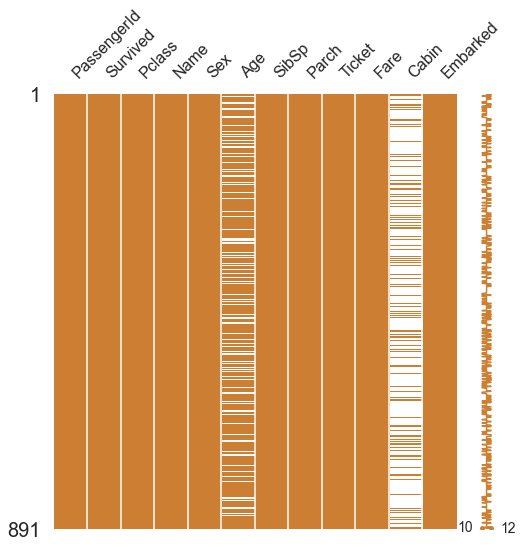

In [15]:
 msno.matrix(df=df_train.iloc[:, :], figsize= (8, 8), color=(0.8, 0.5, 0.2))

<AxesSubplot:>

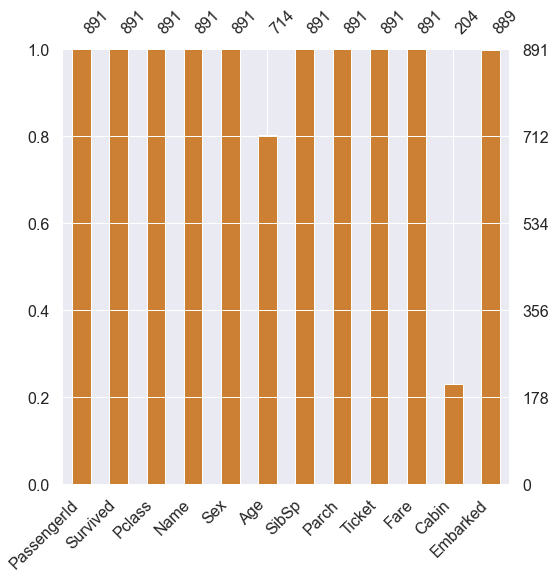

In [28]:
msno.bar(df=df_train.iloc[:, :], figsize= (8, 8), color= (0.8, 0.5, 0.2))

<AxesSubplot:>

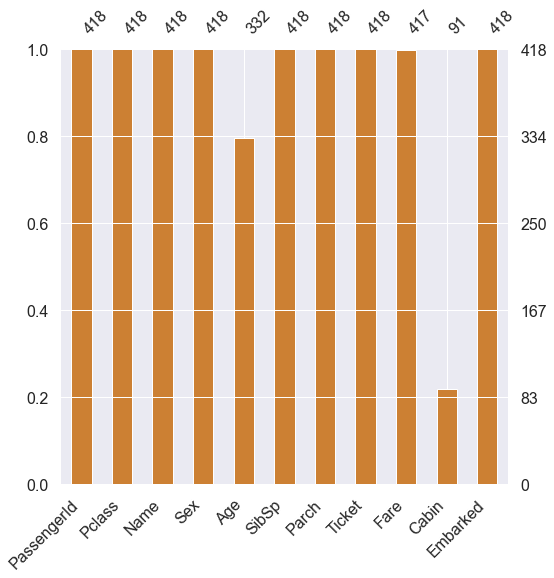

In [19]:
msno.bar(df= df_test.iloc[:, :], figsize=(8, 8), color = (0.8, 0.5, 0.2))

## 1.2 Target label 확인 (survived)

- target label 이 어떤 distribution을 가지고 있는지 확인 해야함 
- 지금 같은 binary classification 문제의 경우에서, 1과 0의 분포가 어떠냐에 따라 모델의 평가 방법이 달라질 수 있습니다.

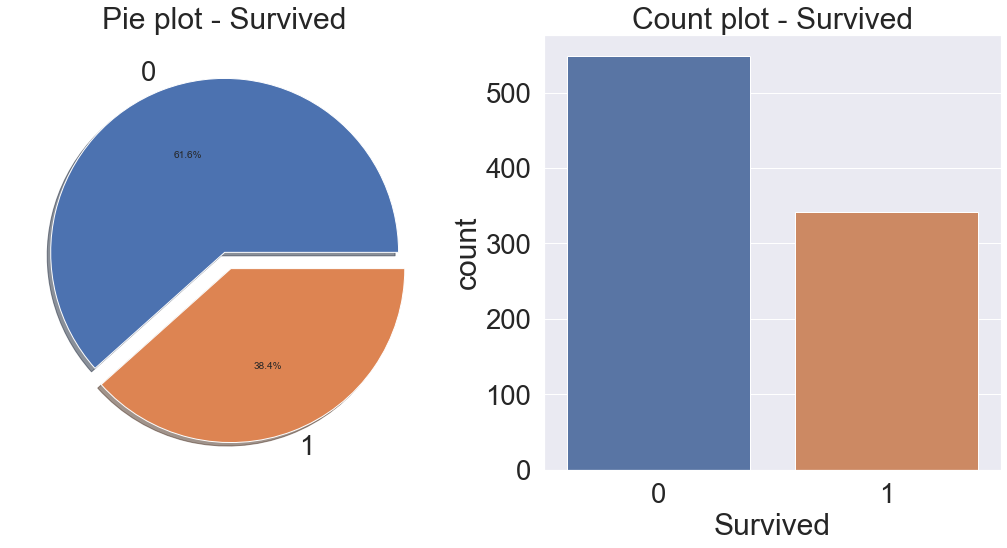

In [33]:
f, ax = plt.subplots(1, 2, figsize = (18, 8))

df_train['Survived'].value_counts().plot.pie(explode = [0, 0.1], autopct= '%1.1f%%', ax= ax[0], shadow = True)
ax[0].set_title('Pie plot - Survived')
ax[0].set_ylabel('')

sns.countplot('Survived', data=df_train, ax= ax[1])
ax[1].set_title('Count plot - Survived')

plt.show()

- 안타깝게도 죽은 사람이 더 많음 
- 38.4%가 살아남았습니다
- target label의 분포가 제법 균일(balanced) 합니다. 불균일한 경우, 예를 들어 100 중 1이 99, 0이 100인 경우에는
만약 모델이 모든것을 1이라 해도 정확도가 99%가 나오게 됩니다. 0를 찾는 문제라면 이 모델은
원하는 결과를 줄 수 없게 됩니다. 

# 2. Exploratory data analysis (EDA) 

- 데이터 안에 숨겨진 사실을 찾기 위해선 적절한 시각화가 필요합니다. 
- 시각화 라이브러리는 **matplotlib, seaborn, plotly** 등이 있습니다. 특정 목적에 맞는 소스코드를 정리해두어 필요할때마다 참고하면 편합니다. 

## 2.1 Pclass

- Pclass 는 ordinal, 서수형 데이터. 카테고리면서 순서가 있는 데이터 타입 
- Pclass에 따른 생존률 차이를 살펴보자. 엑셀의 피벗 차트와 유사한 작업을 하게 되는데, pandas dataframe 에서는 groupby 를 사용하면 쉽게 할 수 있음. 또한 pivot이라는 메소드도 있다.
- Pclass, survived 를 가져온 후 Pclass로 묶습니다. 그러고나면 각 pclass마다 0,1이 count가 되는데 이를 평균내면 각 pclass별 생존률이 나옵니다 

- 아래와 같이 count()를 하면, 각 class 에 몇명이 있는지 확인 할 수 있으며 sum()을 하면, 216명 중 생존한 (survived = 1) 사람의 총합을 주게 된다


In [24]:
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index= True).count()

,Survived
Pclass,
1,216
2,184
3,491


In [27]:
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).sum()

,Survived
Pclass,
1,136
2,87
3,119


- pandas 의 crosstab을 사용하면 좀 더 위 과정을 수월하게 볼 수 있음

In [28]:
pd.crosstab(df_train['Pclass'], df_train['Survived'], margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


- grouped 객체에 mean()을 하게 되면, 각 클래스별 생존률을 얻을 수 있습니다
- classe 1 : 80 / (80 + 136) = 0.63

<AxesSubplot:xlabel='Pclass'>

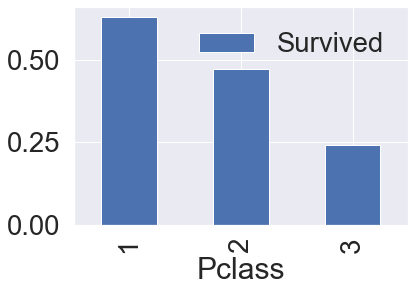

In [30]:
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).mean().sort_values(by='Survived', ascending = False).plot.bar()

- Pclasse가 좋을 수록 생존률이 높음 

- seaborn의 **countplot**을 이용하면, 특정 label에 따른 개수를 확인해볼 수 있음.

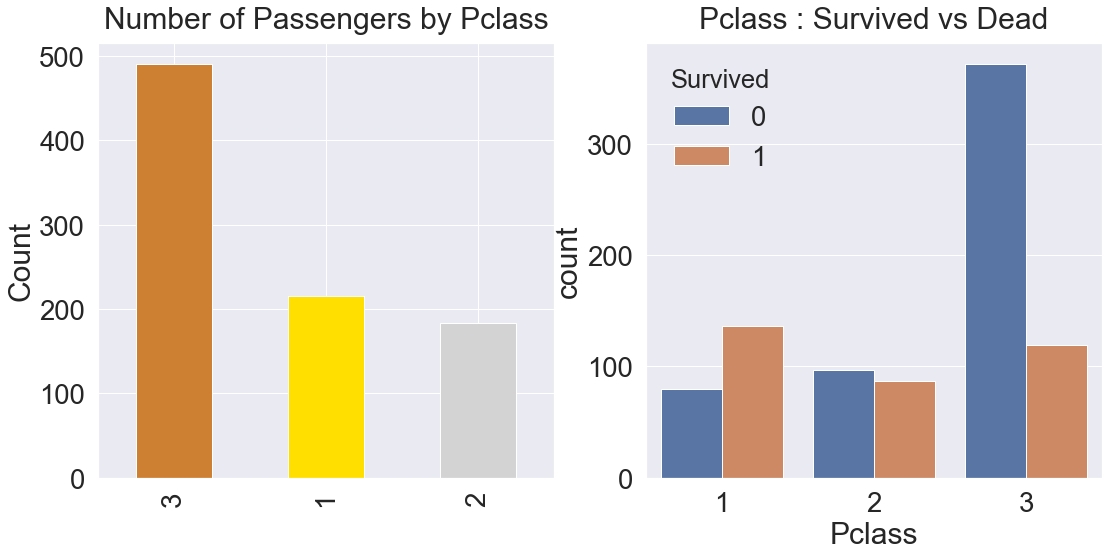

In [32]:
y_position = 1.02
f, ax = plt.subplots(1, 2, figsize = (18, 8))
df_train['Pclass'].value_counts().plot.bar(color = ['#CD7F32','#FFDF00','#D3D3D3'], ax= ax[0])
ax[0].set_title('Number of Passengers by Pclass', y= y_position)
ax[0].set_ylabel('Count')

sns.countplot('Pclass', hue = 'Survived', data= df_train, ax=ax[1])
ax[1].set_title('Pclass : Survived vs Dead', y= y_position)
plt.show()
                    
                                                    
                                                    

- 클래스가 높을 수록, 생존 확률이 높은걸 확인 할 수 있음 
- 우리는 생존에 Pclass가 큰 영향을 미친다고 생각해볼 수 있으며 나중에 모델을 세울 때 이 feature를 사용하는것이 좋을것이라 판단할 수 있음


## 2.2 Sex

- 성별로 생존률이 어떻게 달라지는지 확인


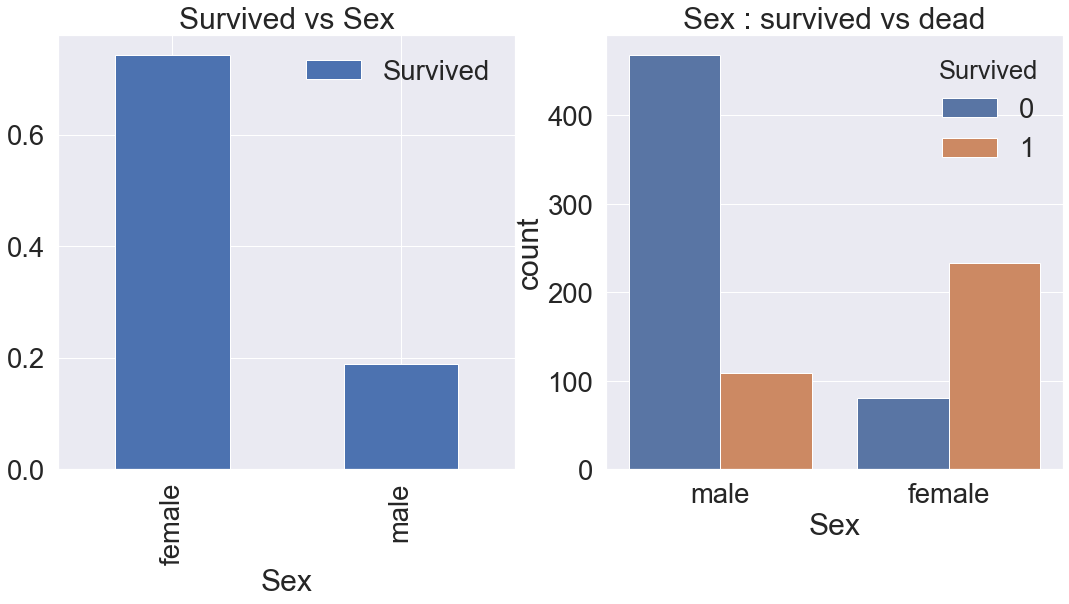

In [33]:
f, ax= plt.subplots(1, 2, figsize = (18, 8))
df_train[['Sex', 'Survived']].groupby(['Sex'], as_index = True).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')

sns.countplot('Sex', hue = 'Survived', data= df_train, ax= ax[1])
ax[1].set_title('Sex : survived vs dead')
plt.show()

- 여자가 생존할 확률이 더 높음

In [34]:
df_train[['Sex', 'Survived']].groupby(['Sex'], as_index= False).mean().sort_values(by='Survived', ascending = False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [35]:
pd.crosstab(df_train['Sex'], df_train['Survived'], margins= True).style.background_gradient(cmap = 'summer_r')

Survived,0,1,All
Sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


- Pclass와 마찬가지로 Sex도 예측모델에 쓰일 중요한 feature 임을 알 수 있음 
 

 
  

## 2.3 Both Sex and Pclass

- Sex, Pclass 두가지에 관하여 생존이 어떻게 달라지는지 살펴보자 
- seaborn 의 **factorplot**을 이용하면, 손쉽게 3개의 차원으로 이루어진 그래프를 그릴 수 있음 



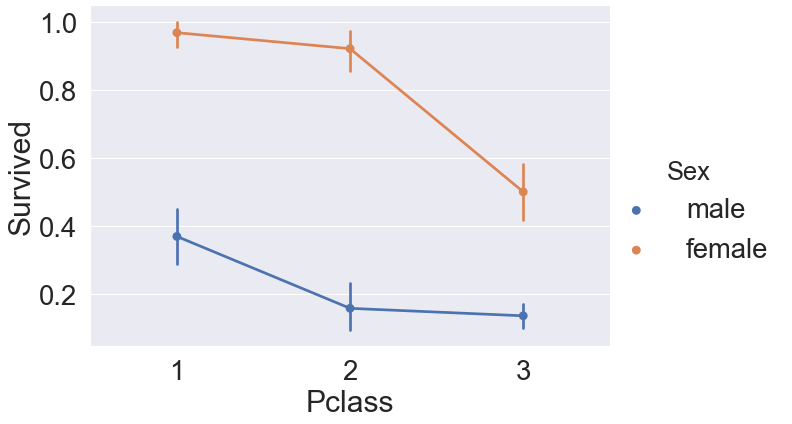

In [36]:
sns.factorplot('Pclass', 'Survived', hue = 'Sex', data= df_train, size = 6, aspect = 1.5)

- 모든 클래스에서 female 이 살 확률이 male 보다 높은 걸 알 수 있음
- 또한 남자 여자 상관없이 클래스가 높을 수록 살 확률이 높다
- hue 대신 column 으로 하면 아래와 같아진다 

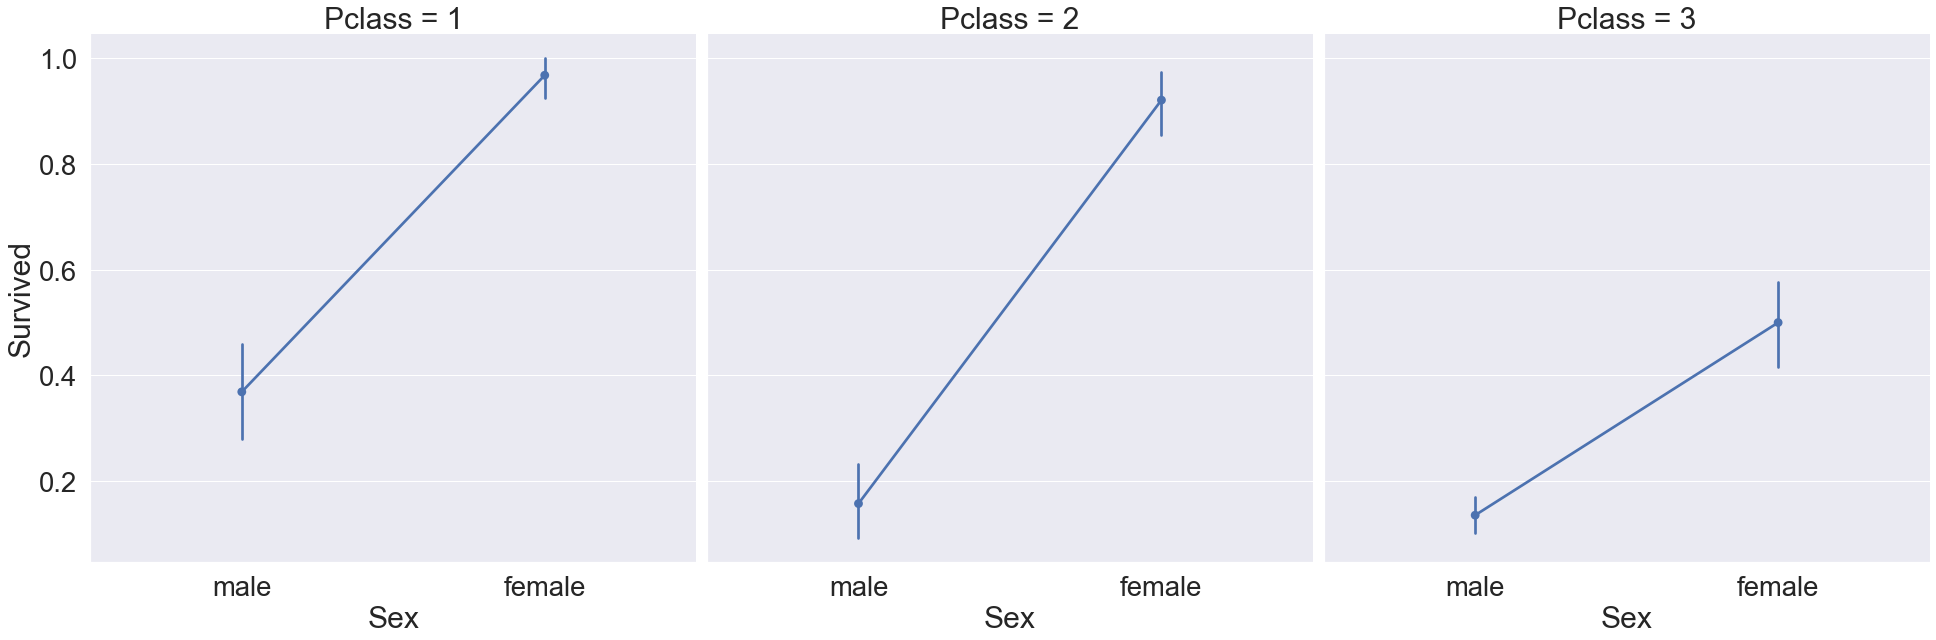

In [37]:
sns.factorplot(x='Sex', y='Survived', col='Pclass', data= df_train, satureation = .5, size = 9, aspect = 1) 

## 2.4 Age

In [39]:
print('제일 나이 많은 탑승객 : {:.1f} Years'.format(df_train['Age'].max()))
print('제일 어린 탑승객 : {:.1f} Years'.format(df_train['Age'].min()))
print('탑승객 평균 나이 : {:.1f} Years'.format(df_train['Age'].mean()))

제일 나이 많은 탑승객 : 80.0 Years
제일 어린 탑승객 : 0.4 Years
탑승객 평균 나이 : 29.7 Years


- 생존에 따른 Age의 histogram 

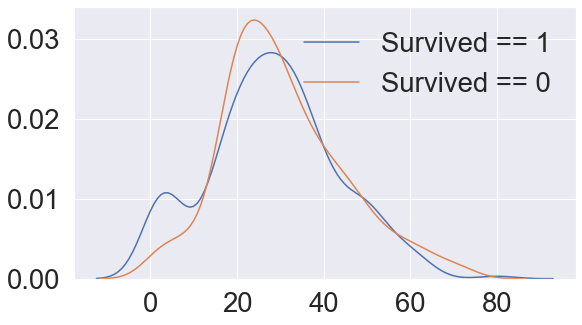

In [40]:
fig, ax = plt.subplots(1, 1, figsize = (9, 5))
sns.kdeplot(df_train[df_train['Survived'] == 1]['Age'], ax = ax)
sns.kdeplot(df_train[df_train['Survived'] == 0]['Age'], ax = ax)
plt.legend(['Survived == 1', 'Survived == 0'])
plt.show()

- 생존자 중 나이가 어린 경우가 많음을 볼 수 있음 

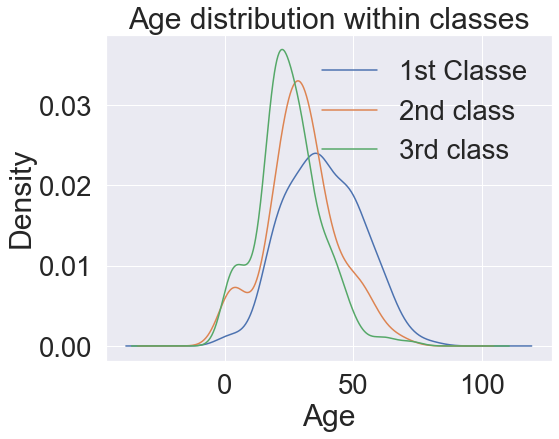

In [41]:
#age distribution withing classes 
plt.figure(figsize = (8,6))
df_train['Age'][df_train['Pclass'] == 1].plot(kind='kde')
df_train['Age'][df_train['Pclass'] == 2].plot(kind='kde')
df_train['Age'][df_train['Pclass'] == 3].plot(kind='kde')

plt.xlabel('Age')
plt.title('Age distribution within classes')
plt.legend(['1st Classe', '2nd class', '3rd class'])
                

- class가 높을 수록 나이 많은 사람의 비중이 커짐
- 나이대가 변하면서 생존률이 어떻게 되는지 보려고 함 
- 나이 범위를 점점 넓혀가며 생존률이 어떻게 되는지 봅시다 

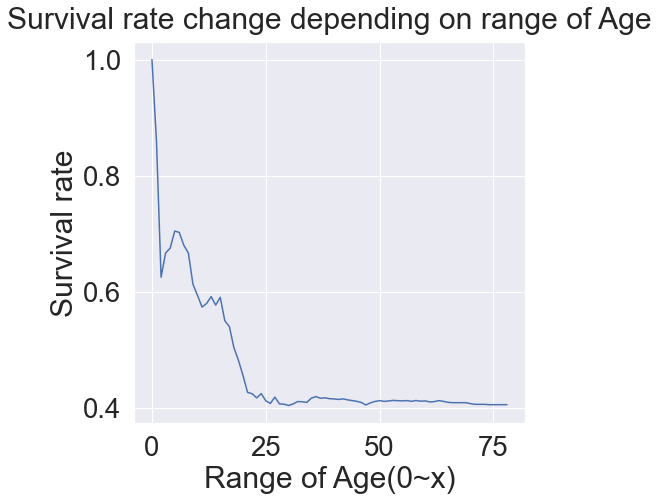

In [42]:
cummulate_survival_ratio = []
for i in range(1, 80):
    cummulate_survival_ratio.append(df_train[df_train['Age'] < i]['Survived'].sum() / len(df_train[df_train['Age'] < i]['Survived']))

plt.figure(figsize=(7, 7))
plt.plot(cummulate_survival_ratio)
plt.title('Survival rate change depending on range of Age', y=1.02)
plt.ylabel('Survival rate')
plt.xlabel('Range of Age(0~x)')
plt.show()

- 나이가 어릴 수록 생존률이 확실히 높음 
- 우리는 이 나이가 중요한 feature로 쓰일 수 있음을 확인함

## 2.5 Pclass, Sex, Age

- Sex, Pclass, Age, Survived 모두에 대해서 보고 싶습니다. 이를 쉽게 그려주는 것이 seaborn 의 **violinplot** 입니다.
- x 축은 우리가 나눠서 보고 싶어하는 case (pclass, Sex) 를 나타내고 y축은 보고싶어하는 distribution (Age) 입니다.

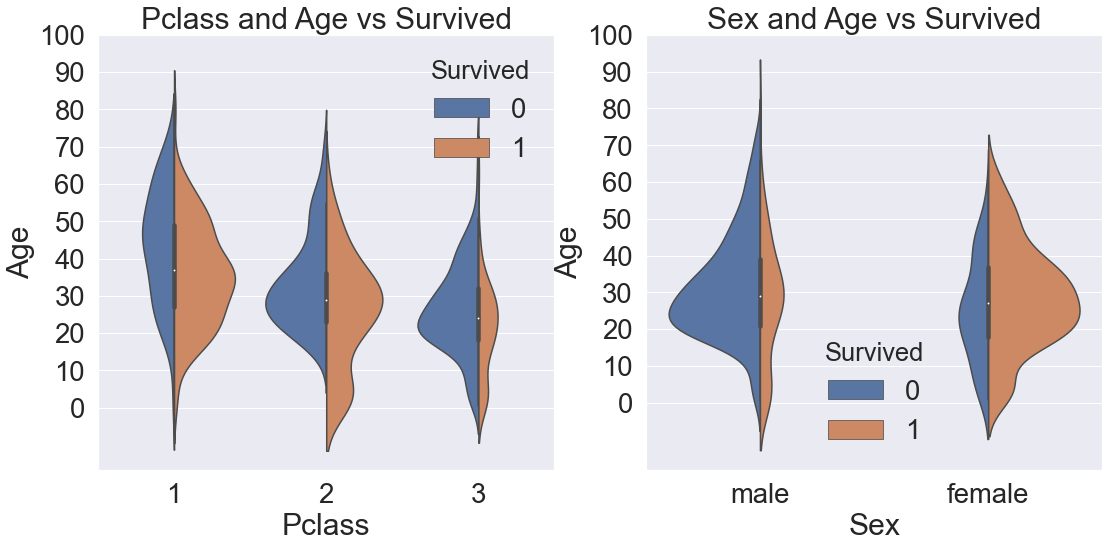

In [43]:
f, ax = plt.subplots(1, 2, figsize = (18, 8))
sns.violinplot('Pclass', 'Age', hue = 'Survived', data= df_train, scale = 'count', split = True, ax = ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0, 110, 10))

sns.violinplot('Sex', 'Age', hue = 'Survived', data= df_train, scale = 'count', split = True, ax= ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0, 110, 10))
plt.show()

- 왼쪽 그림은 Pclass별로 Age의 distibution 이 어떻게 다른지, 거기에 생존여부에 따라 구분한 그래프 
- 오른쪽 그림도 sex, 생존에 따른 distribution 이 어떻게 다른지 보여주는 그래프
- 생존만 봤을때 모든 클래스에서 나이가 어릴 수록 생존을 만힝 한 것을 볼 수 있음 
- 오른쪽 그림에서 보면 명확히 여자가 생존을 많이 한 것을 볼 수 있음
- 여성과 아이를 먼저 챙겼구나! 

## Embarked 

- = 탑승한 항수
- 탑승한 곳에 따른 생존률을 보자 

<AxesSubplot:xlabel='Embarked'>

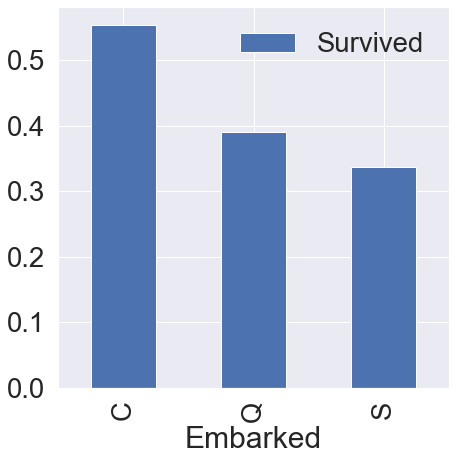

In [44]:
f, ax= plt.subplots(1, 1, figsize = (7, 7))
df_train[['Embarked', 'Survived']].groupby(['Embarked'], as_index= True).mean().sort_values(by='Survived', ascending = False).plot.bar(ax= ax)

- 조금의 차이는 있지만 생존률은 비슷. c가 제일 높음
- 모델에 얼마나 큰 영향을 미칠지는 모르겠지만 그래도 사용! 
- 모델은 만들고 나면 우리가 사용한 feature들이 얼마나 중요한 역할을 했는지 확인해볼 수 있음 추후에 모델을 만들고 난 다음에 살펴볼 것 
- 다른 feature로 split 해서 살펴보자 

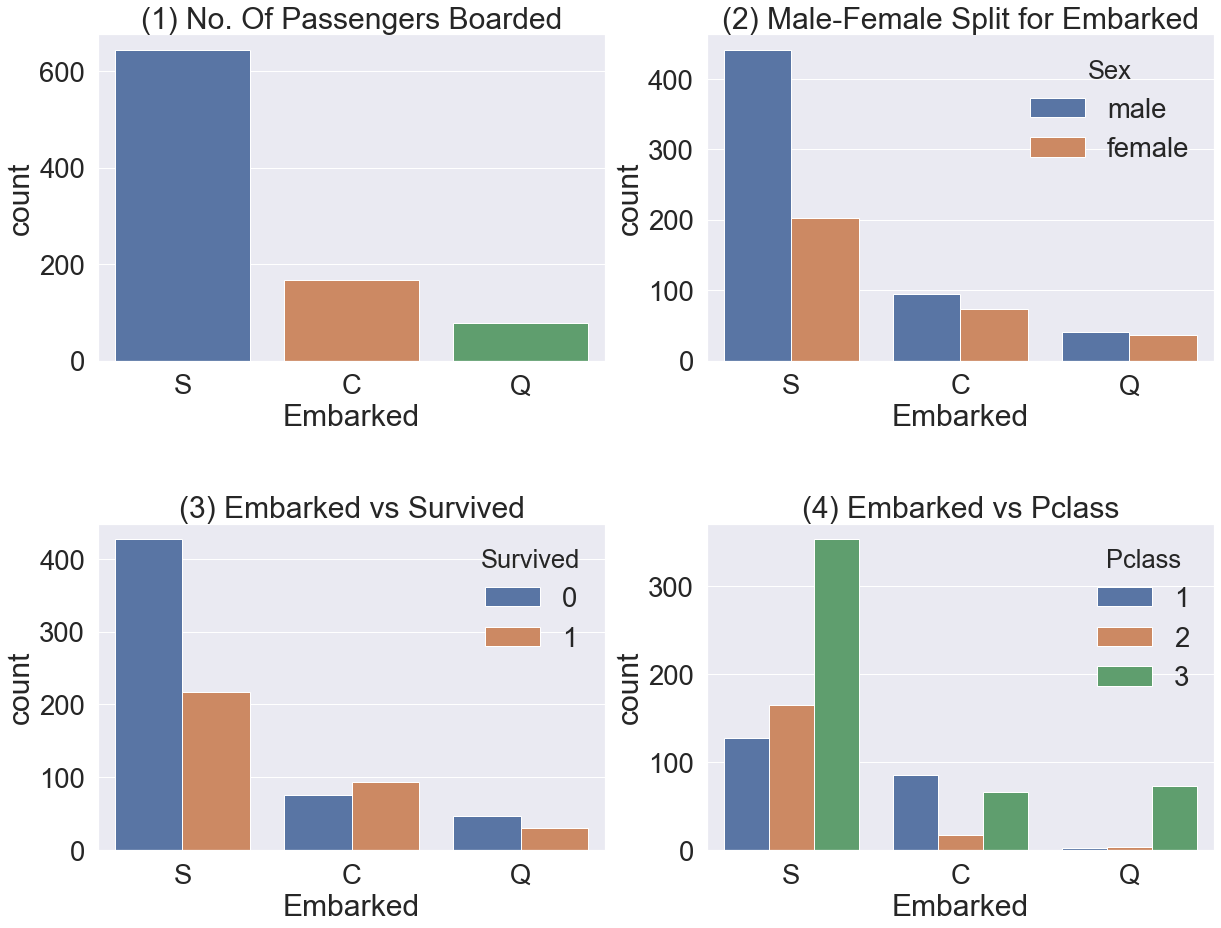

In [45]:
f, ax = plt.subplots(2, 2, figsize = (20, 15))
sns.countplot('Embarked', data= df_train, ax= ax[0, 0])
ax[0,0].set_title('(1) No. Of Passengers Boarded')

sns.countplot('Embarked', hue = 'Sex', data= df_train, ax=ax[0,1])
ax[0, 1].set_title('(2) Male-Female Split for Embarked')

sns.countplot('Embarked', hue = 'Survived', data=df_train, ax=ax[1,0])
ax[1, 0].set_title('(3) Embarked vs Survived')

sns.countplot('Embarked', hue = 'Pclass', data= df_train, ax=ax[1,1])
ax[1, 1].set_title('(4) Embarked vs Pclass')

plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()


- 1. 전체적으로 봤을 때 s에서 가장 많은 사람이 탑승
- 2. c 와 Q는 남녀 비율은 비슷하고 S는 남자가 더 많다
- 3. 생존 확률이 S인 경우 많이 낮은 걸 볼 수 있음 (이전 그래프에서 봤음)
- 4. class 로 split해서 보니, c가 생존확률이 높은건 클래스가 높은 사람이 많이 타서 그런 걸 알 수 있음 S는 3rd class가 많아서 생존확률이 낮게 나옴 

## 2.7 Family - SibSp (형제 자매) + Parch (부모, 자녀) 

- SibSp 와 Parch를 합하면 Family 가 될 것입니다. Family 로 합쳐서 분석해보자 


In [46]:
df_train['FamilySize'] = df_train['SibSp'] + df_train['Parch'] + 1 # 자신을 포함해아해서 
df_test['FamilySize']= df_test['SibSp'] + df_test['Parch'] + 1 # 자신을 포함해아해서 

In [47]:
print('Maximum size of Family : ', df_train['FamilySize'].max())
print('Minimum size of Family : ', df_train['FamilySize'].min())


Maximum size of Family :  11
Minimum size of Family :  1


- FamilySize와 생존의 관계를 보자 

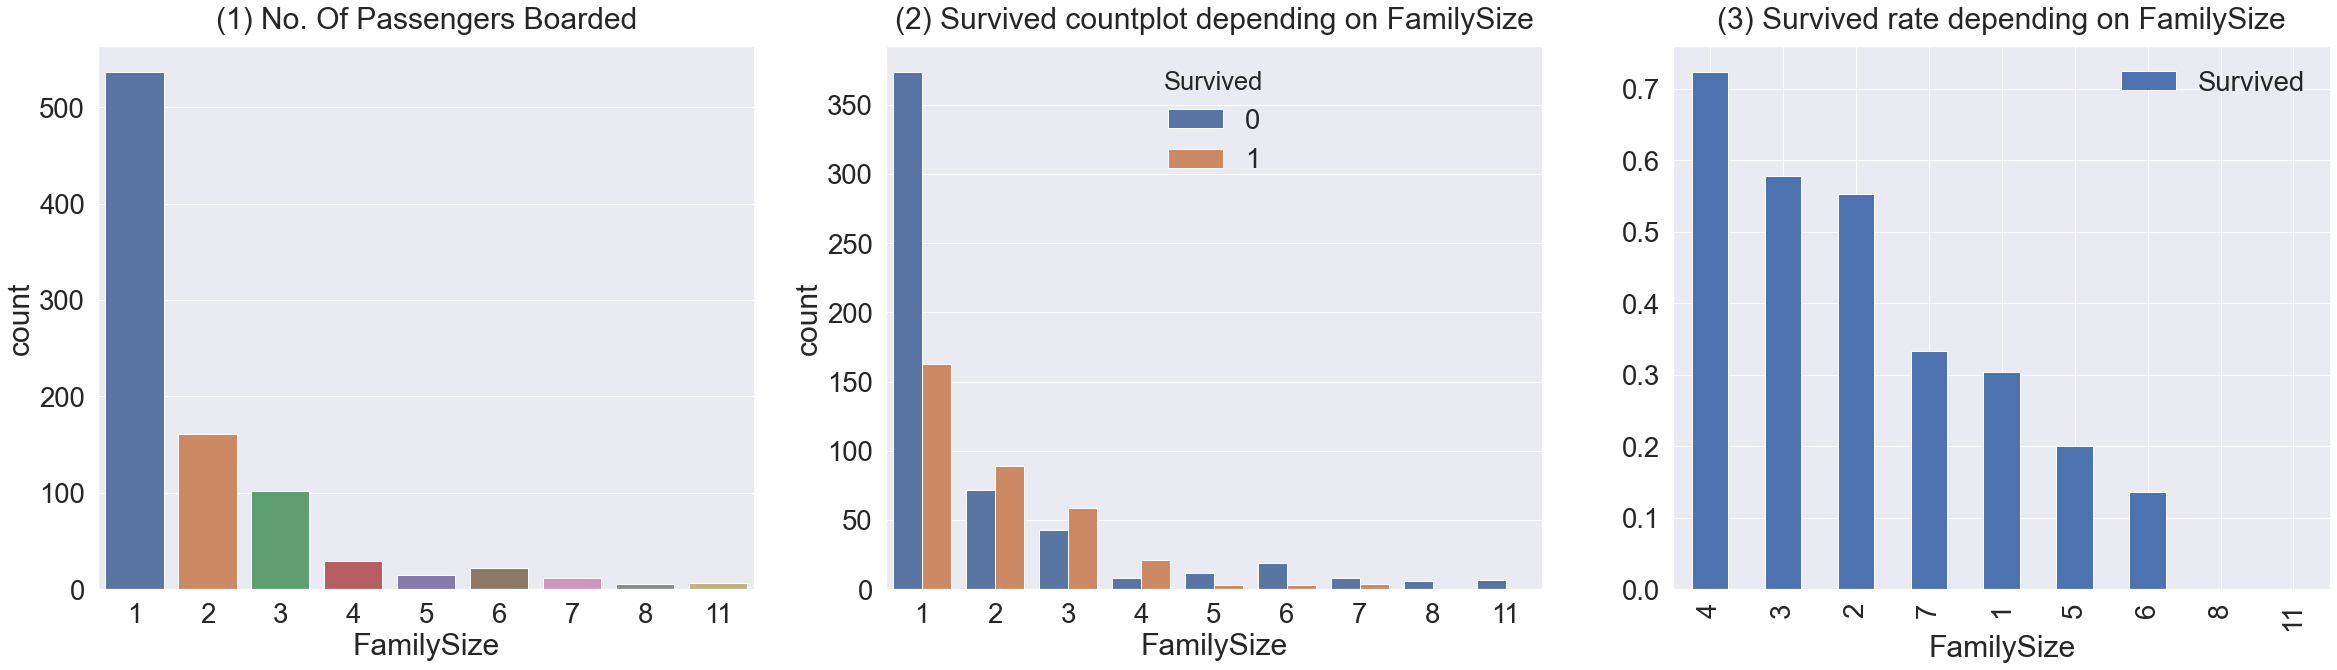

In [48]:
f, ax= plt.subplots(1, 3, figsize = (40, 10))

sns.countplot('FamilySize', data= df_train, ax=ax[0])
ax[0].set_title('(1) No. Of Passengers Boarded', y= 1.02)

sns.countplot('FamilySize', hue = 'Survived', data= df_train, ax= ax[1])
ax[1].set_title('(2) Survived countplot depending on FamilySize', y= 1.02)

df_train[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index = True).mean().sort_values(by='Survived', ascending = False).plot.bar(ax= ax[2])
ax[2].set_title('(3) Survived rate depending on FamilySize',  y=1.02)

plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

- 1. 가족 크기가 1-11. 대부분 1명이고 그 다음으로 2,3,4명
- 2,3. 가족 크기에 따른 생존비교. 가족이 4명인 경우가 가장 생존률이 높다. 가족수가 많아질수록 생존확률이 낮아짐. 가족수가 너무 작아도 너무 커도 생존확률이 작음. 3-4명 선에서 생존확률이 높은 걸 확인할 수 있음 

## 2.8 Fare

- 탑승요금. continous feature. histo 를 그려보자 

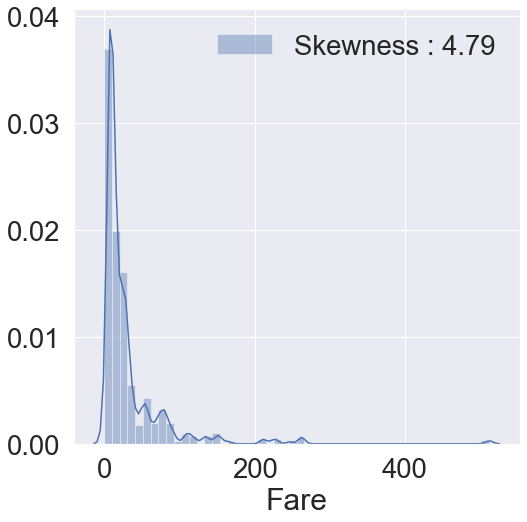

In [52]:
fig, ax = plt.subplots(1, 1, figsize = (8, 8))
g = sns.distplot(df_train['Fare'], color = 'b', label = 'Skewness : {:.2f}'.format(df_train['Fare'].skew()), ax= ax)
g = g.legend(loc='best') 


- distribution 이 매우 비대칭 (high skewness). 만약 이대로 모델에 넣어준다면 자칫 모델이 잘못 학습할 수도 있음. 몇개 없는 outliner에 대하여 너무 민감하게 반응한다면 실제 예측시에 좋지 못한 결과를 부를 수 있음 

- outliner의 영향을 줄이기 위해 Fare에 log를 취하겠다 

- 여기서 우리는 pandas의 유용한 기능을 사용할 수 있음. dataframe의 특정 columns 에 공통된 작업(함수)를 적용하고 있으면 아래의 **map**, 또는 **apply**를 사용하면 매우 손쉽게 적용할 수 있음.

- 우리가 지금 원하는것은 Fare columns의 데이터 모두를 log 값 취하는 것인데 파이썬의 간간한 **lambda** 함수를 이용해 간단한 로그를 적용하는 함수를 **map**에 인수로 넣어주면 Fare columns데이터에 그대로 적용이 된다! 



In [53]:
df_test.loc[df_test.Fare.isnull(), 'Fare'] = df_test['Fare'].mean()
#testset에 있는 nan value를 평균값으로 치환

df_train['Fare'] = df_train['Fare'].map(lambda i : np.log(i) if i > 0 else 0)
df_test['Fare'] = df_train['Fare'].map(lambda i : np.log(i) if i > 0 else 0)


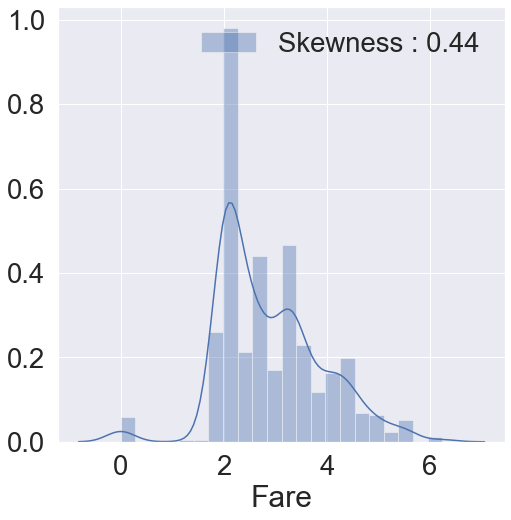

In [54]:
fig, ax = plt.subplots(1, 1, figsize = (8, 8))

g= sns.distplot(df_train['Fare'], color = 'b', label = 'Skewness : {:.2f}'.format(df_train['Fare'].skew()), ax= ax)
g = g.legend(loc='best')

- log를 취하니 비대칭성이 많이 사라짐
- 이런 작업을 통해 모델이 좀 더 좋은 성능을 내도록 할 수 있음 
- 방금 한 것은 feature engineering 에 들어가는 부분인데 미리 한 것
- **feature engineering** : 모델을 학습 시키기 위해 그리고 그 모델의 성능을 높이기 위해 feature들에 여러 조작을 가하거나 새로운 feature를 추가하는 것 

## 2.9 Cabin

- NaN 이 대략 80% 이므로 생존에 영향을 미칠 중요한 정보를 얻어내기 쉽지 않음
- 모델에 포함 안 시키겠음!


In [55]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,1.981001,NaN,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,4.266662,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,2.070022,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,3.972177,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,2.085672,NaN,S,1


## 2.10 Ticket

- NaN이 없음. String data 이므로 우리가 어떤 작업을 해주어야 실제 모델에 사용할 수 있는데 이를 위해선 아이디어가 필요함

In [56]:
df_train['Ticket'].value_counts()

347082      7
1601        7
CA. 2343    7
347088      6
3101295     6
           ..
368703      1
349219      1
347073      1
370377      1
330959      1
Name: Ticket, Length: 681, dtype: int64

- 매우 다양.. 어떤 특징을 이끌어내서 생존과 연결시킬 수 있을까? 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn')
sns.set(font_scale=2.5)

import missingno as msno

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

#                     1. Dataset 확인 

In [4]:
df_train = pd.read_csv('data/train.csv')
df_test = pd.read_csv('data/test.csv')

In [59]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [60]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [61]:
df_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


##                                 1-1. Null data check 

In [63]:
for col in df_train.columns:
    msg = 'column : {:>10}\t Percent of NaN value : {:2f}%'.format(col, 100 * (df_train[col].isnull().sum()/ df_train[col].shape[0]))
    print(msg)

column : PassengerId	 Percent of NaN value : 0.000000%
column :   Survived	 Percent of NaN value : 0.000000%
column :     Pclass	 Percent of NaN value : 0.000000%
column :       Name	 Percent of NaN value : 0.000000%
column :        Sex	 Percent of NaN value : 0.000000%
column :        Age	 Percent of NaN value : 19.865320%
column :      SibSp	 Percent of NaN value : 0.000000%
column :      Parch	 Percent of NaN value : 0.000000%
column :     Ticket	 Percent of NaN value : 0.000000%
column :       Fare	 Percent of NaN value : 0.000000%
column :      Cabin	 Percent of NaN value : 77.104377%
column :   Embarked	 Percent of NaN value : 0.224467%


In [64]:
for col in df_test.columns:
    msg = 'column : {:>10}\t Percent of NaN value : {:2f}%'.format(col, 100 * (df_test[col].isnull().sum()/ df_test[col].shape[0]))
    print(msg)

column : PassengerId	 Percent of NaN value : 0.000000%
column :     Pclass	 Percent of NaN value : 0.000000%
column :       Name	 Percent of NaN value : 0.000000%
column :        Sex	 Percent of NaN value : 0.000000%
column :        Age	 Percent of NaN value : 20.574163%
column :      SibSp	 Percent of NaN value : 0.000000%
column :      Parch	 Percent of NaN value : 0.000000%
column :     Ticket	 Percent of NaN value : 0.000000%
column :       Fare	 Percent of NaN value : 0.239234%
column :      Cabin	 Percent of NaN value : 78.229665%
column :   Embarked	 Percent of NaN value : 0.000000%


<AxesSubplot:>

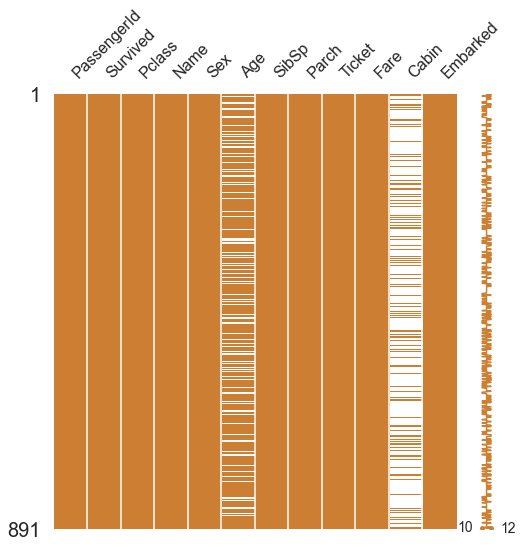

In [65]:
msno.matrix(df= df_train.iloc[:, :], figsize = (8, 8), color= (0.8, 0.5, 0.2))

<AxesSubplot:>

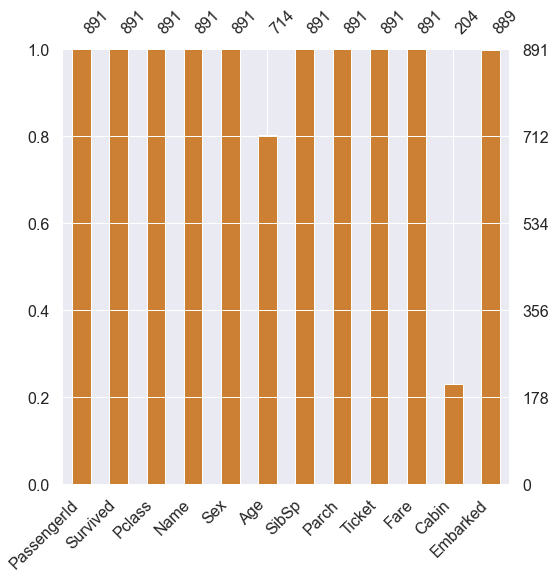

In [5]:
msno.bar(df= df_train.iloc[:, :], figsize = (8, 8), color= (0.8, 0.5, 0.2))

<AxesSubplot:>

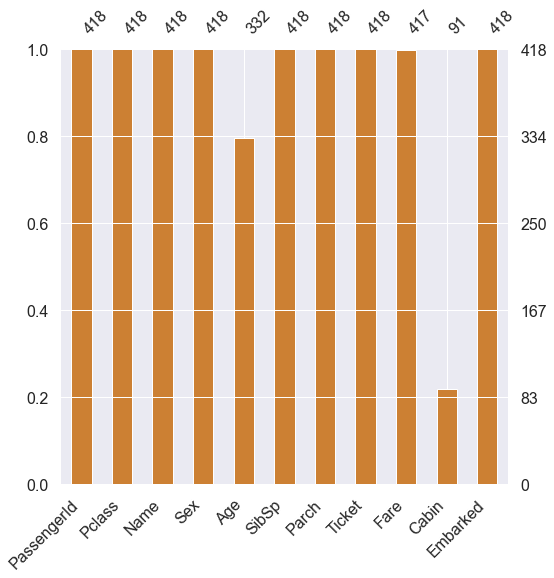

In [22]:
msno.bar(df= df_test.iloc[:, :], figsize = (8, 8), color= (0.8, 0.5, 0.2))

## 1-2 Target label 

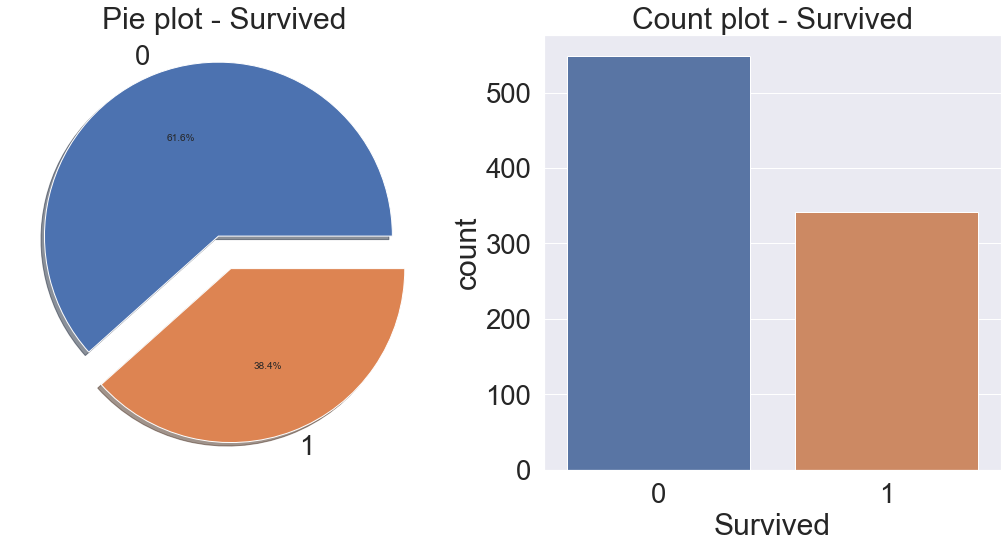

In [17]:
f, ax = plt.subplots(1, 2, figsize = (18, 8))

df_train['Survived'].value_counts().plot.pie(explode = [0.1, 0.1], autopct='%1.1f%%', ax= ax[0], shadow = True )
ax[0].set_title('Pie plot - Survived')
ax[0].set_ylabel('')

sns.countplot('Survived', data=df_train, ax= ax[1])
ax[1].set_title('Count plot - Survived')


plt.show()

# 2. EDA

## 2-1 Pclass 

In [34]:
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index = True).count()

,Survived
Pclass,
1,216
2,184
3,491


In [35]:
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index = True).mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


In [38]:
pd.crosstab(df_train['Pclass'], df_train['Survived'], margins = True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


<AxesSubplot:xlabel='Pclass'>

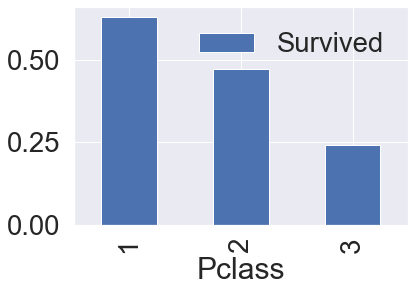

In [39]:
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index = True).mean().sort_values(by='Survived', ascending = False).plot.bar()

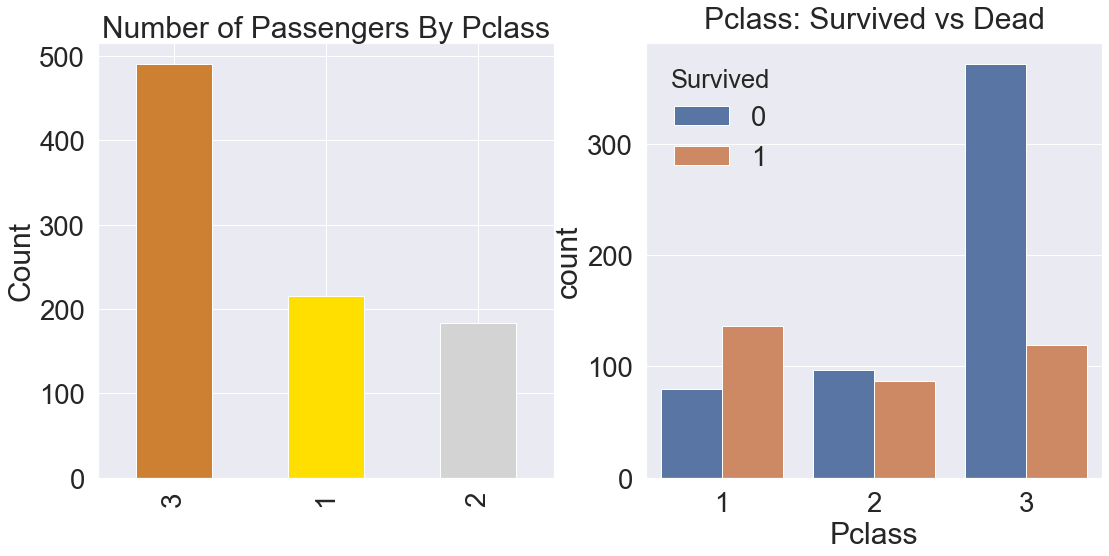

In [47]:


f, ax = plt.subplots(1, 2, figsize = (18, 8))

df_train['Pclass'].value_counts().plot.bar(color = ['#CD7F32','#FFDF00','#D3D3D3'], ax= ax[0])
ax[0].set_title('Number of Passengers By Pclass')
ax[0].set_ylabel('Count')

sns.countplot('Pclass', hue = 'Survived', data= df_train, ax= ax[1])
ax[1].set_title('Pclass: Survived vs Dead', y=y_position)

plt.show()

## 2-2 Sex

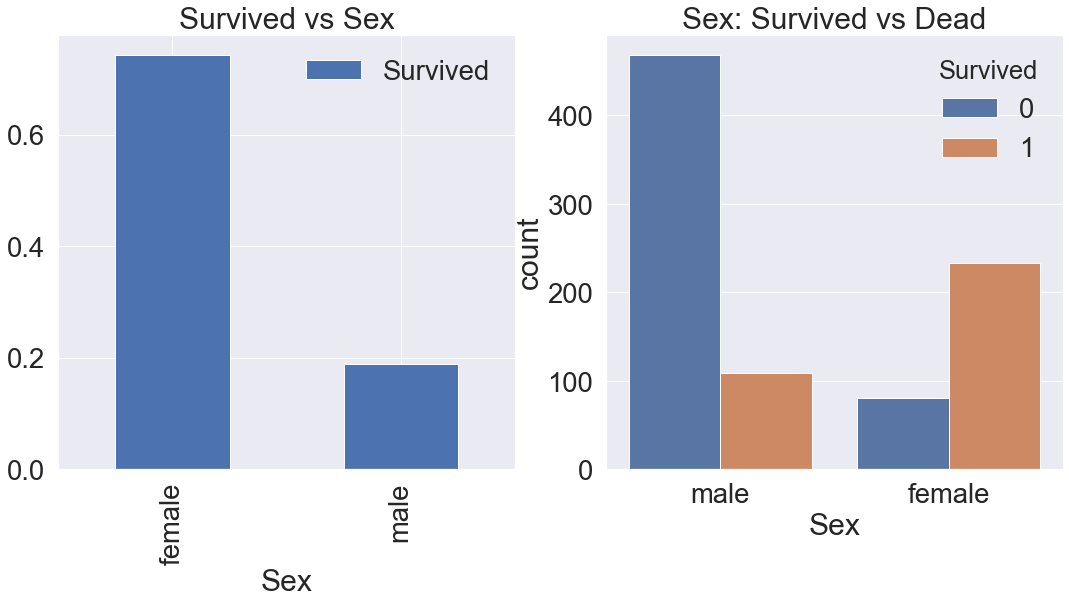

In [48]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))

df_train[['Sex', 'Survived']].groupby(['Sex'], as_index=True).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')

sns.countplot('Sex', hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('Sex: Survived vs Dead')
plt.show()

In [49]:
df_train[['Sex', 'Survived']].groupby(['Sex'], as_index = False).mean().sort_values(by = 'Survived', ascending = False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [50]:
pd.crosstab(df_train['Sex'], df_train['Survived'], margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


## 2-3 Sex & Pclass 

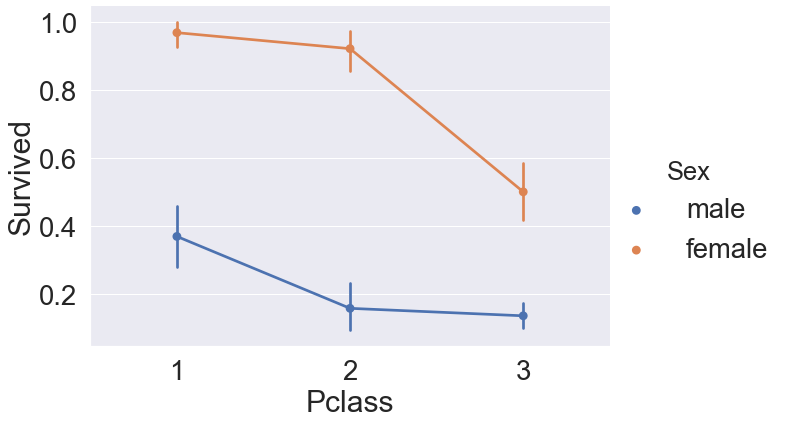

In [51]:
sns.factorplot('Pclass', 'Survived', hue = 'Sex', data= df_train, size = 6, aspect = 1.5)

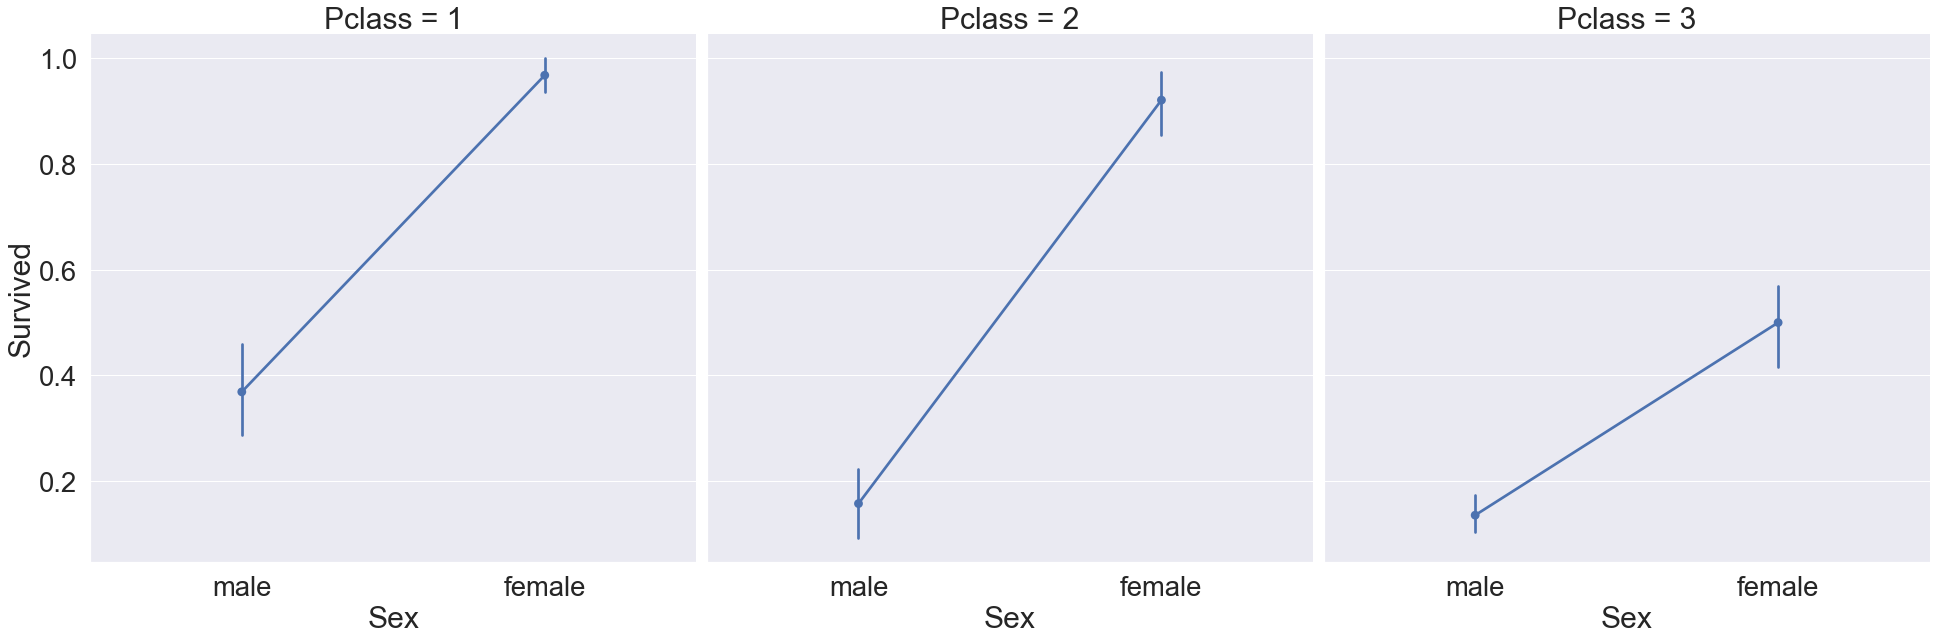

In [54]:
sns.factorplot(x='Sex', y='Survived', col = 'Pclass', data= df_train, satureation =.5, size = 9, aspect = 1)

## 2-4 Age


In [56]:
print('제일 나이 많은 탑승객 : {:.1f} Years'.format(df_train['Age'].max()))
print('제일 나이 어린 탑승객 : {:.1f} Years'.format(df_train['Age'].min()))
print('탑승객 평균 나이 : {:.1f} Years'.format(df_train['Age'].mean()))

제일 나이 많은 탑승객 : 80.0 Years
제일 나이 어린 탑승객 : 0.4 Years
탑승객 평균 나이 : 29.7 Years


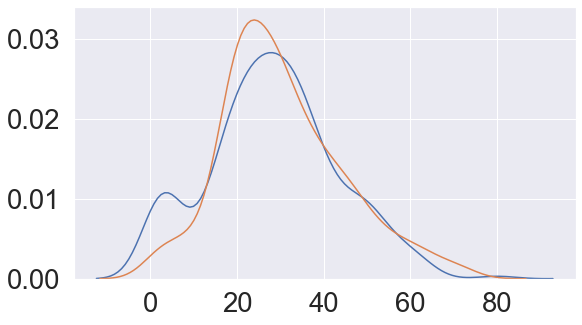

In [57]:
fig, ax = plt.subplots(1, 1, figsize = (9, 5))

sns.kdeplot(df_train[df_train['Survived'] == 1]['Age'], ax = ax)
sns.kdeplot(df_train[df_train['Survived'] == 0]['Age'], ax = ax)

plt.legend(['Survived' == 1], ['Survived' == 0])

plt.show()

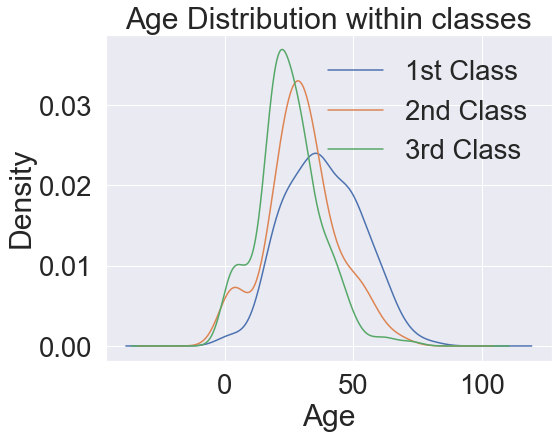

In [59]:
plt.figure(figsize=(8, 6))

df_train[df_train['Pclass'] == 1]['Age'].plot(kind = 'kde')
df_train['Age'][df_train['Pclass'] == 2].plot(kind = 'kde')
df_train['Age'][df_train['Pclass'] == 3].plot(kind = 'kde')

plt.xlabel('Age')
plt.title('Age Distribution within classes')
plt.legend(['1st Class', '2nd Class', '3rd Class'])

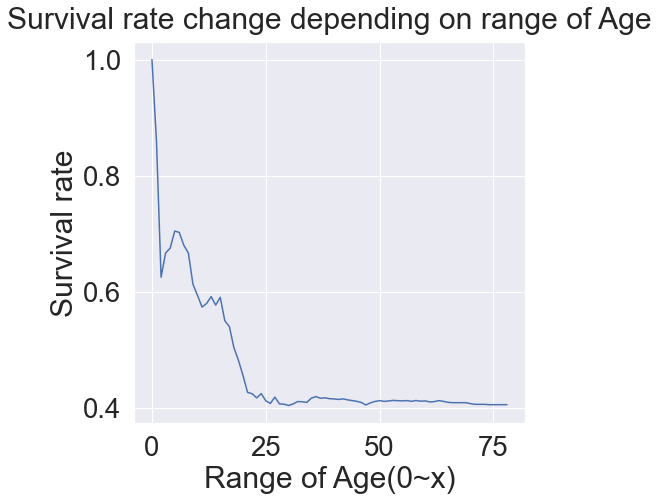

In [60]:
cummulate_survival_ratio = []

for i in range(1, 80):
    cummulate_survival_ratio.append(df_train[df_train['Age'] < i]['Survived'].sum() / len(df_train[df_train['Age'] < i]['Survived']))
    
plt.figure(figsize = (7, 7))
plt.plot(cummulate_survival_ratio)
plt.title('Survival rate change depending on range of Age', y=1.02)
plt.ylabel('Survival rate')
plt.xlabel('Range of Age(0~x)')
plt.show()

## 2-5 Pclass, Sex, Age

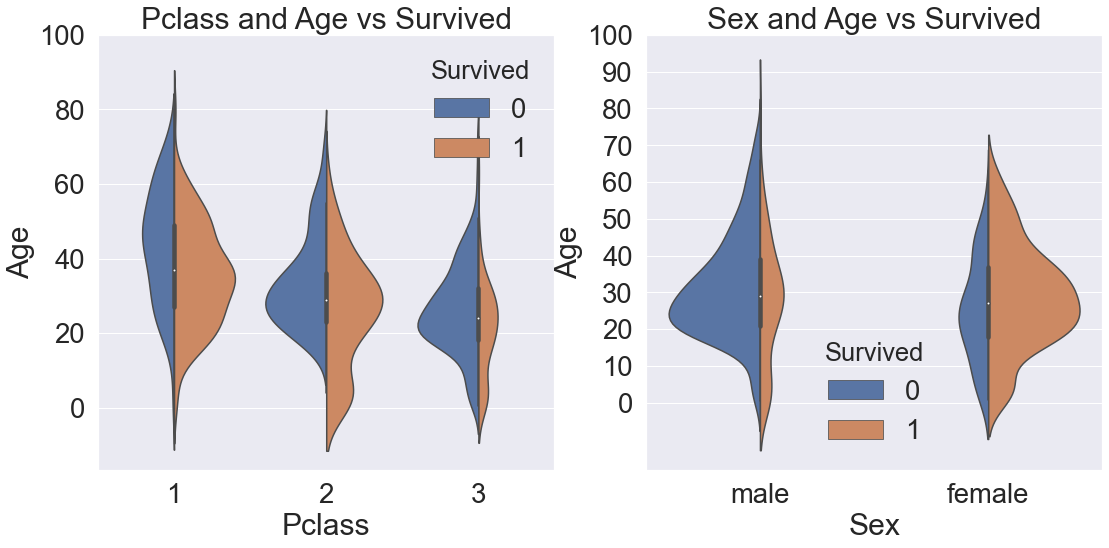

In [75]:
f, ax = plt.subplots(1, 2, figsize = (18, 8))

sns.violinplot('Pclass', 'Age', hue = 'Survived', data= df_train, scale = 'count', split = True, ax= ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0,110,20))

sns.violinplot('Sex', 'Age', hue = 'Survived', data= df_train, scale = 'count', split = True, ax= ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0,110,10))

plt.show()


## 2-6 embarked

<AxesSubplot:xlabel='Embarked'>

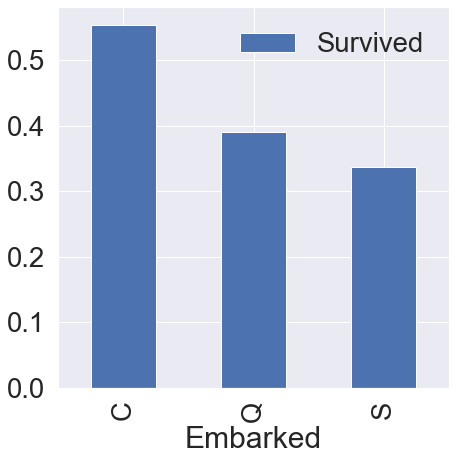

In [77]:
f, ax = plt.subplots(1, 1, figsize = (7, 7))
df_train[['Embarked', 'Survived']].groupby(['Embarked'], as_index = True).mean().sort_values(by='Survived', ascending = False).plot.bar(ax=ax)

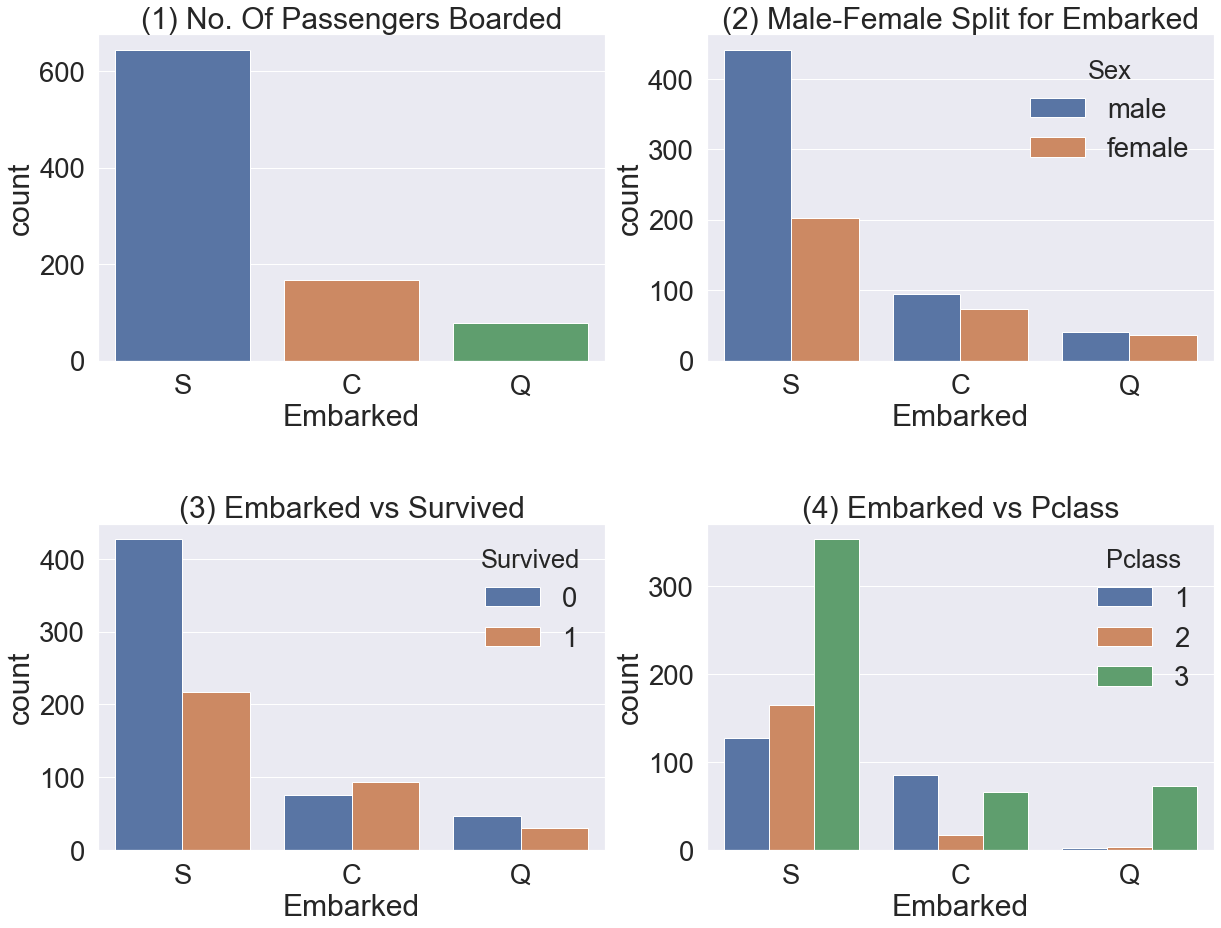

In [78]:
f, ax = plt.subplots(2, 2, figsize = (20, 15))

sns.countplot('Embarked', data= df_train, ax= ax[0,0])
ax[0,0].set_title('(1) No. Of Passengers Boarded')

sns.countplot('Embarked', hue = 'Sex', data= df_train, ax= ax[0,1])
ax[0,1].set_title('(2) Male-Female Split for Embarked')

sns.countplot('Embarked', hue = 'Survived', data= df_train, ax= ax[1,0])
ax[1,0].set_title('(3) Embarked vs Survived')

sns.countplot('Embarked', hue = 'Pclass', data= df_train, ax= ax[1,1])
ax[1,1].set_title('(4) Embarked vs Pclass')

plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

## 2- 7 Family = Sibsp + Parch


In [81]:
df_train['FamilySize'] = df_train['SibSp'] + df_train['Parch'] + 1
df_test['FamilySize'] = df_test['SibSp'] + df_test['Parch'] + 1
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,4
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,1


In [80]:
print("Maximum size of Family", df_train['FamilySize'].max())
print("Minimum size of Family", df_train['FamilySize'].min())

Maximum size of Family 11
Minimum size of Family 1


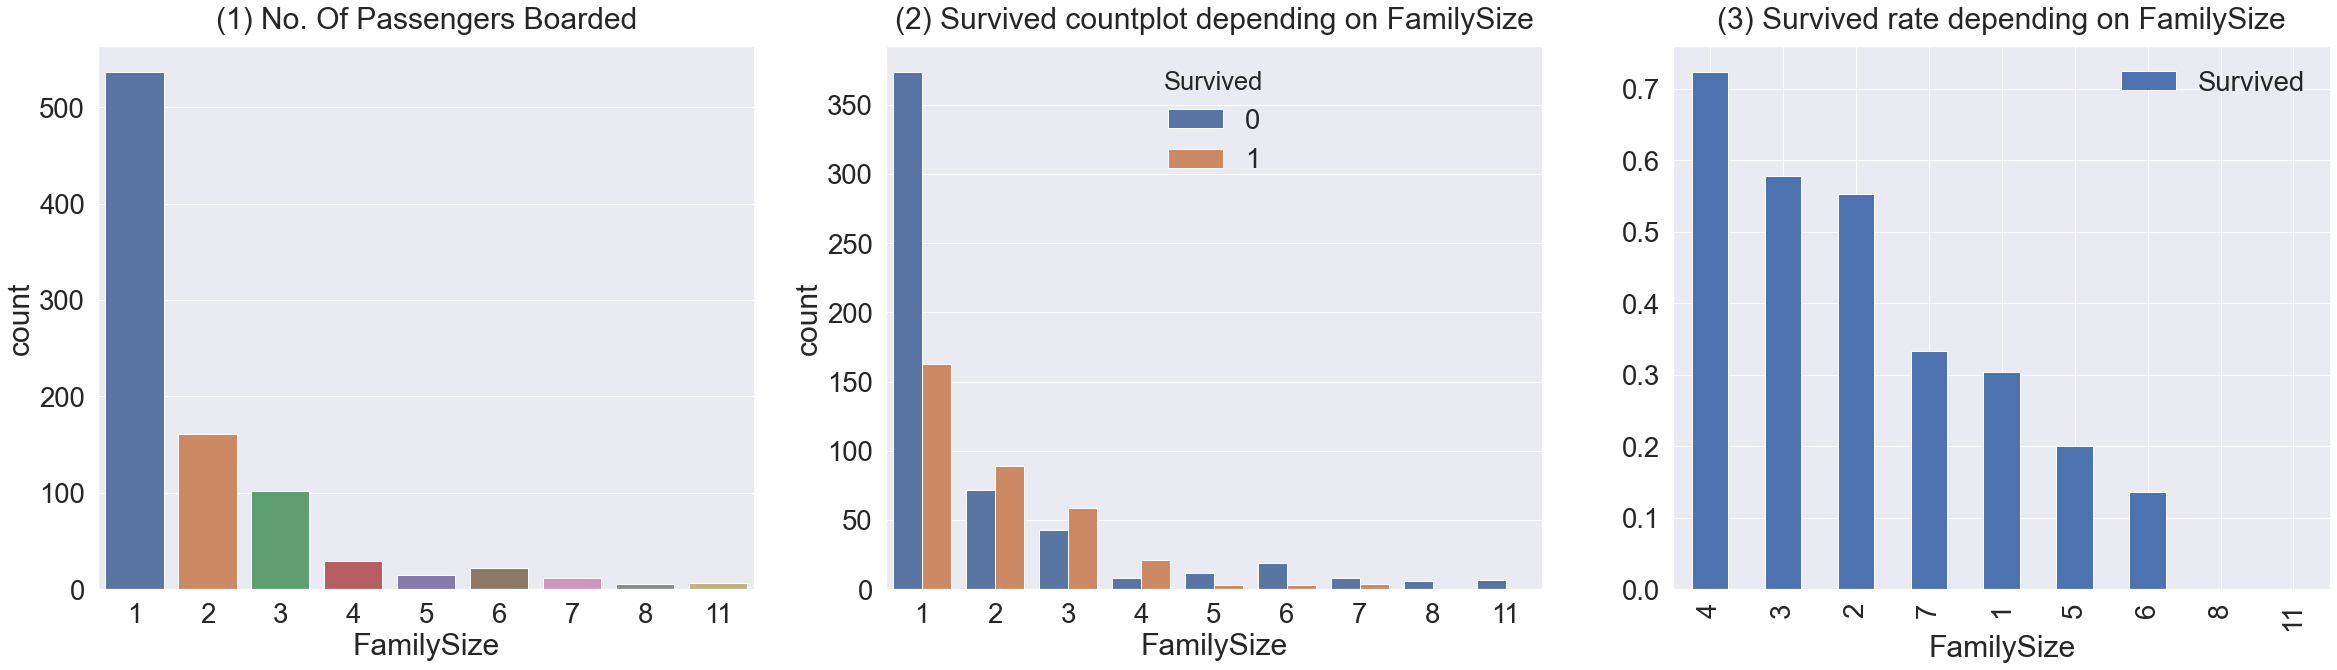

In [83]:
f,ax=plt.subplots(1, 3, figsize=(40,10))
sns.countplot('FamilySize', data=df_train, ax=ax[0])
ax[0].set_title('(1) No. Of Passengers Boarded', y=1.02)

sns.countplot('FamilySize', hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('(2) Survived countplot depending on FamilySize',  y=1.02)

df_train[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar(ax=ax[2])
ax[2].set_title('(3) Survived rate depending on FamilySize',  y=1.02)

plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()


## 2-8 Fare

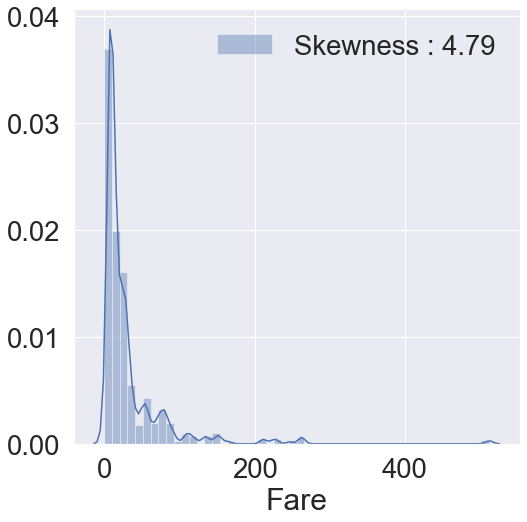

In [82]:
fig, ax = plt.subplots(1, 1, figsize = (8, 8))
g = sns.distplot(df_train['Fare'], color = 'b', label = 'Skewness : {:.2f}'.format(df_train['Fare'].skew()), ax = ax)
g = g.legend(loc= 'best')

## outliner -> log 취하기

In [86]:
df_test.loc[df_test.Fare.isnull(), 'Fare'] = df_test['Fare'].mean()

df_train['Fare'] = df_train['Fare'].map(lambda i : np.log(i) if i > 0 else 0)
df_test['Fare'] = df_test['Fare'].map(lambda i : np.log(i) if i > 0 else 0)


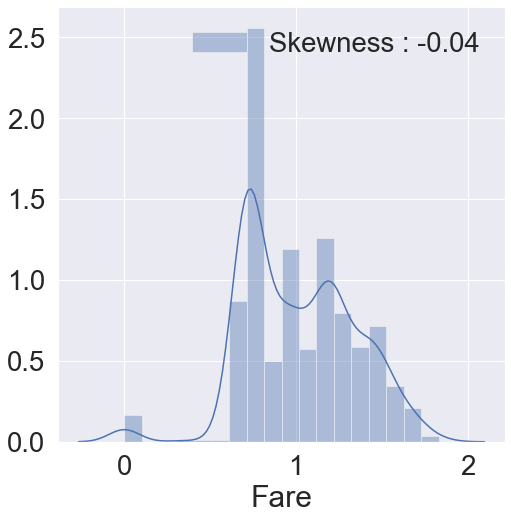

In [87]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
g = sns.distplot(df_train['Fare'], color='b', label='Skewness : {:.2f}'.format(df_train['Fare'].skew()), ax=ax)
g = g.legend(loc='best')

## 2-9 Cabin

In [88]:
df_train.head(
)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,0.683603,NaN,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,1.450832,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,0.727559,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,1.379314,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,0.735091,NaN,S,1


## 2-10 Ticket 

In [89]:
df_train['Ticket'].value_counts()

1601        7
CA. 2343    7
347082      7
347088      6
CA 2144     6
           ..
347078      1
17466       1
2680        1
2677        1
11755       1
Name: Ticket, Length: 681, dtype: int64